In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from isaac.visualization import plot_lineplot_with_paper_style
from isaac.statistical_tests import is_best_model_significantly_better

In [3]:
directory = "seq_length_and_res_plots/"
stats = pd.read_hdf(directory+"stats.h5")

baseline_stats = pd.read_hdf("remove_initialisation_effects/stats.h5")
baseline_stats.seed = baseline_stats.seed.astype(int)
baseline_stats = baseline_stats.query("seed < 3")
baseline_stats["features"] = "baseline"

stats = pd.concat([feature_stats, baseline_stats])

stats = stats[stats.Epoch < 25]

In [4]:
stats.head()

,step_size,seq_start,Epoch,Mass Loss,Force Loss,Mass Train Accuracy,Mass Val Accuracy,Force Train Accuracy,Force Val Accuracy,seed
0,3,0,0,1.105159,1.105389,32.542857,32.1,33.171429,34.7,0
1,3,0,1,1.101487,1.098144,34.000000,33.0,37.628571,36.1,0
2,3,0,2,1.101712,1.088670,33.285714,36.4,41.285714,40.3,0
3,3,0,3,1.099736,1.068978,36.114286,33.3,45.600000,43.4,0
4,3,0,4,1.098742,1.055423,37.171429,33.5,45.542857,42.1,0


In [5]:
stats["resolution"] = (60 // stats.step_size).astype(str) +"fps"
stats["length"] = ((2700 - stats.seq_start) // 60).astype(str) + "s"

stats["hue"] = "res="+stats.resolution+" length="+stats.length

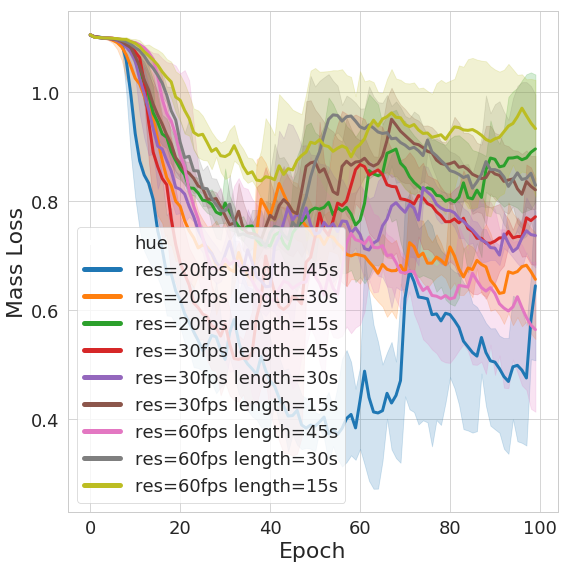

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Loss", data=stats, hue="hue")
plt.savefig(directory+"mass_losses.pdf")

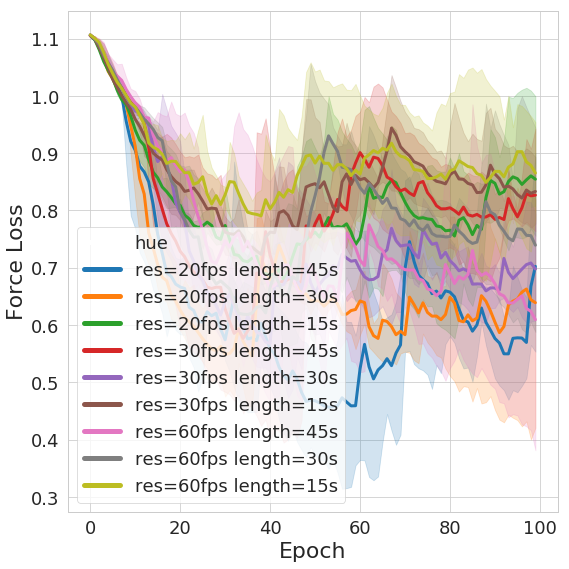

In [7]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Loss", data=stats, hue="hue")
plt.savefig(directory+"force_losses.pdf")

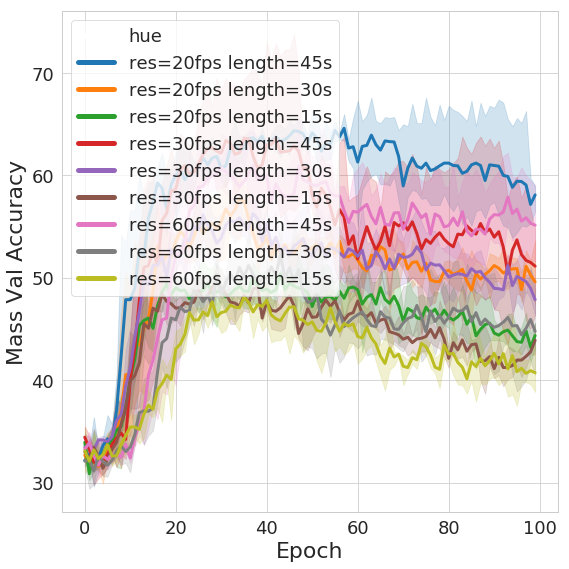

In [8]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Val Accuracy", data=stats, hue="hue")
plt.savefig(directory+"mass_val_accuracies.pdf")

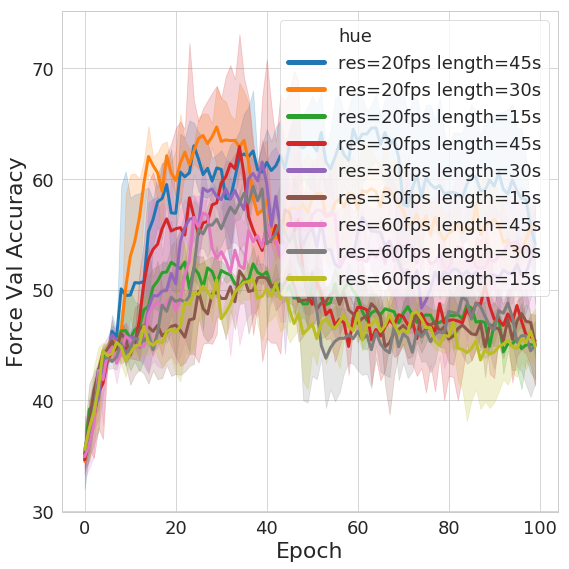

In [9]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Val Accuracy", data=stats, hue="hue")
plt.savefig(directory+"force_val_accuracies.pdf")

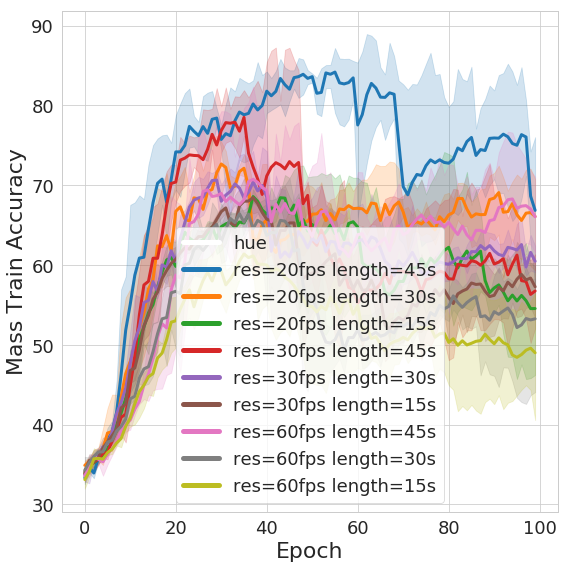

In [10]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Train Accuracy", data=stats, hue="hue")
plt.savefig(directory+"mass_train_accuracies.pdf")

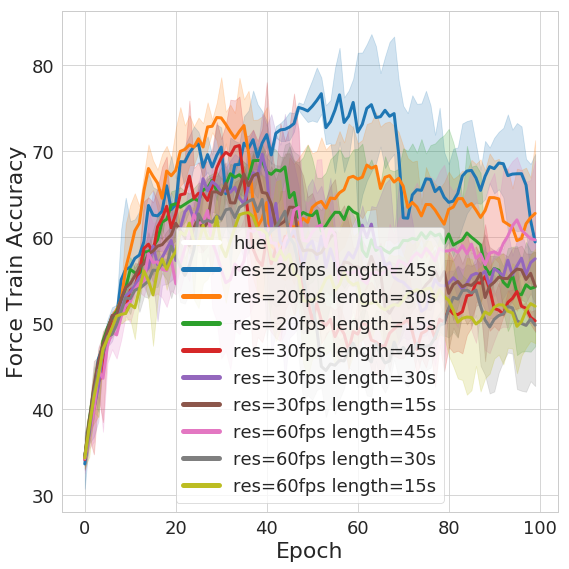

In [11]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Train Accuracy", data=stats, hue="hue")
plt.savefig(directory+"force_train_accuracies.pdf")

In [12]:
conf_mass_accuracies = []
conf_force_accuracies = []

for hue_group, hue_df in stats.groupby("hue"):
    mass_accuracies = []
    force_accuracies = []
    for _, seed_df in hue_df.groupby("seed"):
        mass_accuracies.append(seed_df["Mass Val Accuracy"].max())
        force_accuracies.append(seed_df["Force Val Accuracy"].max())

    conf_mass_accuracies.append((hue_group, mass_accuracies))
    conf_force_accuracies.append((hue_group, force_accuracies))
        
    print(hue_group)
    print("Mass: %.2f $\pm$ %.2f" % (np.mean(mass_accuracies), np.std(mass_accuracies)))
    print("Force: %.2f $\pm$ %.2f" % (np.mean(force_accuracies), np.std(force_accuracies)))
    print()

res=20fps length=15s
Mass: 51.40 $\pm$ 0.94
Force: 53.80 $\pm$ 1.08

res=20fps length=30s
Mass: 58.30 $\pm$ 2.12
Force: 65.97 $\pm$ 2.02

res=20fps length=45s
Mass: 66.07 $\pm$ 1.11
Force: 66.10 $\pm$ 3.18

res=30fps length=15s
Mass: 50.40 $\pm$ 0.70
Force: 52.70 $\pm$ 1.23

res=30fps length=30s
Mass: 57.53 $\pm$ 0.61
Force: 61.87 $\pm$ 1.73

res=30fps length=45s
Mass: 66.40 $\pm$ 5.31
Force: 64.07 $\pm$ 6.72

res=60fps length=15s
Mass: 49.47 $\pm$ 0.66
Force: 53.60 $\pm$ 0.80

res=60fps length=30s
Mass: 52.30 $\pm$ 1.91
Force: 60.67 $\pm$ 0.74

res=60fps length=45s
Mass: 63.10 $\pm$ 1.79
Force: 61.17 $\pm$ 2.24



In [16]:
is_best_model_significantly_better(conf_mass_accuracies)
print()
is_best_model_significantly_better(conf_force_accuracies)

res=30fps length=45s not significantly better than res=20fps length=30s 0.11563806001696592
res=30fps length=45s not significantly better than res=20fps length=45s 0.9349219219890585
res=30fps length=45s not significantly better than res=30fps length=30s 0.07883535483263342
res=30fps length=45s not significantly better than res=60fps length=45s 0.45172591512678045

res=20fps length=45s not significantly better than res=20fps length=30s 0.9624931646380559
res=20fps length=45s not significantly better than res=30fps length=30s 0.17399289973509968
res=20fps length=45s not significantly better than res=30fps length=45s 0.7186188127079309
res=20fps length=45s not significantly better than res=60fps length=30s 0.07843059645594352
res=20fps length=45s not significantly better than res=60fps length=45s 0.1477195607106214
